In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = DataFrame(np.random.randn(4,4), columns=list('ABCD'))
df1

A         B         C         D
0 -1.719818 -0.687718 -0.489825  0.969172
1  0.204661 -0.231016  0.209142 -0.760334
2 -0.892362 -0.851172  0.113201  0.769433
3  1.152373  0.672338  0.306336 -0.390461

In [7]:
def test(a):
    return a**2
df1.apply(lambda x :x.max()+x.min())
df1.apply(lambda x : x**2)
df1.apply(test)

A         B         C         D
0  2.957772  0.472956  0.239928  0.939294
1  0.041886  0.053368  0.043740  0.578108
2  0.796311  0.724494  0.012814  0.592027
3  1.327963  0.452038  0.093842  0.152459

In [8]:
tFormat = lambda x : '%.2f' %x
df1.applymap(tFormat)

A      B      C      D
0  -1.72  -0.69  -0.49   0.97
1   0.20  -0.23   0.21  -0.76
2  -0.89  -0.85   0.11   0.77
3   1.15   0.67   0.31  -0.39

In [11]:
df2 = DataFrame(np.random.randint(4,15,20).reshape(5,4), 
                columns=['ko','eng','math','sci'])
df2
df2['name'] = ['kim','choi','park','kim', 'choi']
df2

ko  eng  math  sci  name
0  11    6     6    8   kim
1  14   10     4   12  choi
2   5   12    11    9  park
3  13   12    14    8   kim
4  12    5     7   10  choi

In [14]:
df2.groupby('name').sum()

ko  eng  math  sci
name                    
choi  26   15    11   22
kim   24   18    20   16
park   5   12    11    9

In [15]:
df2['class'] = [1,1,1,2,2]
df2

ko  eng  math  sci  name  class
0  11    6     6    8   kim      1
1  14   10     4   12  choi      1
2   5   12    11    9  park      1
3  13   12    14    8   kim      2
4  12    5     7   10  choi      2

In [17]:
df2.groupby(['class', 'name']).mean()

ko  eng  math  sci
class name                    
1     choi  14   10     4   12
      kim   11    6     6    8
      park   5   12    11    9
2     choi  12    5     7   10
      kim   13   12    14    8

## tip 연습

In [21]:
tipdf = sns.load_dataset('tips')
tipdf.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [23]:
tipdf['tip_pct'] = tipdf['tip']/ tipdf['total_bill'] * 100
tipdf.head(3)

total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734

In [28]:
# group 기준 성별, 흡연자별 각 컬럼데이터의 평균을 구해보세요...
tipdf_gr = tipdf.groupby(['sex', 'smoker'])
tipdf_gr
#tipdf_gr.mean()

In [30]:
tipdf_gr['tip_pct'].mean()

sex     smoker
Male    Yes       15.277118
        No        16.066872
Female  Yes       18.215035
        No        15.692097
Name: tip_pct, dtype: float64

In [33]:
tipdf_gr['tip_pct'].agg(['mean','sum'])

mean          sum
sex    smoker                        
Male   Yes     15.277118   916.627051
       No      16.066872  1558.486537
Female Yes     18.215035   601.096164
       No      15.692097   847.373242

In [34]:
tipdf.head(3)

total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734

In [39]:
#tipdf을 성별, 흡연자별 각종 데이터를 그룹핑하세요...
tipdf.pivot_table(index=['sex','smoker'])

size       tip    tip_pct  total_bill
sex    smoker                                           
Male   Yes     2.500000  3.051167  15.277118   22.284500
       No      2.711340  3.113402  16.066872   19.791237
Female Yes     2.242424  2.931515  18.215035   17.977879
       No      2.592593  2.773519  15.692097   18.105185

In [50]:
#tipdf 에 있는 데이터 중에서 total_bill, tip 에 대해서 그룹핑(성별, 날짜)
# 컬럼의 기준은 smoker
tip_pv = tipdf.pivot_table(values=['total_bill', 'tip'], 
                           index=['sex','day'], columns=['smoker'],
                           margins=True, aggfunc=np.mean
                          )
tip_pv

tip              ...     total_bill           
smoker            Yes        No    ...             No        All
sex    day                         ...                          
Male   Thur  3.058000  2.941500    ...      18.486500  18.714667
       Fri   2.741250  2.500000    ...      17.475000  19.857000
       Sat   2.879259  3.256563    ...      19.929063  20.802542
       Sun   3.521333  3.115349    ...      20.403256  21.887241
Female Thur  2.990000  2.459600    ...      16.014400  16.715312
       Fri   2.682857  3.125000    ...      19.365000  14.145556
       Sat   2.868667  2.724615    ...      19.003846  19.680357
       Sun   3.500000  3.329286    ...      20.824286  19.872222
All          3.008710  2.991854    ...      19.188278  19.785943

[9 rows x 6 columns]

In [44]:
tip_pv.iloc[:,0:2]

tip          
smoker            Yes        No
sex    day                     
Male   Thur  3.058000  2.941500
       Fri   2.741250  2.500000
       Sat   2.879259  3.256563
       Sun   3.521333  3.115349
Female Thur  2.990000  2.459600
       Fri   2.682857  3.125000
       Sat   2.868667  2.724615
       Sun   3.500000  3.329286

In [53]:
# 식당에 방문하는 고객의 그룹핑 기준 : 성별, 흡연자별
# 날짜별로 방문 빈도수를 계산해서 표출하세요... 총합도 같이 계산하세요...
# 데이터는 tip_pct 사용
tipdf.pivot_table(values=['tip_pct'], index=['sex','smoker'], 
                  columns=['day'], aggfunc=len, margins=True)

tip_pct                         
day              Thur   Fri   Sat   Sun    All
sex    smoker                                 
Male   Yes       10.0   8.0  27.0  15.0   60.0
       No        20.0   2.0  32.0  43.0   97.0
Female Yes        7.0   7.0  15.0   4.0   33.0
       No        25.0   2.0  13.0  14.0   54.0
All              62.0  19.0  87.0  76.0  244.0

In [54]:
tipdf.head(3)

total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734

## 시계열 데이터 처리

In [56]:
data = np.random.randint(80,90,20).reshape(5,4)
idx_data = ['2017-02-03','2017-03-05','2018-05-06','2018-08-23','2019-04-04']
df3 = DataFrame(data, index=idx_data, columns=list('ABCD'))
df3

A   B   C   D
2017-02-03  86  82  87  85
2017-03-05  83  80  85  84
2018-05-06  87  82  89  82
2018-08-23  87  82  89  88
2019-04-04  86  89  80  88

In [57]:
df3.index

Index(['2017-02-03', '2017-03-05', '2018-05-06', '2018-08-23', '2019-04-04'], dtype='object')

In [58]:
df3.index = pd.to_datetime(df3.index)
df3.index

DatetimeIndex(['2017-02-03', '2017-03-05', '2018-05-06', '2018-08-23',
               '2019-04-04'],
              dtype='datetime64[ns]', freq=None)

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2017-02-03 to 2019-04-04
Data columns (total 4 columns):
A    5 non-null int32
B    5 non-null int32
C    5 non-null int32
D    5 non-null int32
dtypes: int32(4)
memory usage: 120.0 bytes


In [60]:
df3

A   B   C   D
2017-02-03  86  82  87  85
2017-03-05  83  80  85  84
2018-05-06  87  82  89  82
2018-08-23  87  82  89  88
2019-04-04  86  89  80  88

In [62]:
df3.resample(rule='Q').mean()

A     B     C     D
2017-03-31  84.5  81.0  86.0  84.5
2017-06-30   NaN   NaN   NaN   NaN
2017-09-30   NaN   NaN   NaN   NaN
2017-12-31   NaN   NaN   NaN   NaN
2018-03-31   NaN   NaN   NaN   NaN
2018-06-30  87.0  82.0  89.0  82.0
2018-09-30  87.0  82.0  89.0  88.0
2018-12-31   NaN   NaN   NaN   NaN
2019-03-31   NaN   NaN   NaN   NaN
2019-06-30  86.0  89.0  80.0  88.0

In [63]:
timeIdx = pd.date_range('2015-01-01', periods=1000)
df4 = DataFrame(np.random.randn(1000,4), index=timeIdx, columns=list('ABCD'))
df4

A         B         C         D
2015-01-01  0.898708 -0.494491  0.369139  0.580641
2015-01-02  0.161317 -0.773367 -0.434614 -2.733368
2015-01-03  0.092959 -0.252896  1.507894 -0.117099
2015-01-04  0.102467  1.634885  0.862319 -0.955348
2015-01-05  1.265862  1.714933 -0.819717 -1.196945
2015-01-06  0.094739  0.653676  1.257569 -1.275436
2015-01-07  1.738784  0.272457 -0.020236  0.511739
2015-01-08  0.877059  1.593988  0.226645  0.750822
2015-01-09 -0.203925 -0.870911  0.304078  0.433551
2015-01-10 -0.421421  0.473720  0.210747 -0.580068
2015-01-11 -1.186886  0.456136 -0.568371  0.381600
2015-01-12 -0.993409  0.197513  0.565127  1.723732
2015-01-13  0.103440  0.583211  0.069953  0.614347
2015-01-14 -0.237988  0.663493  0.693270 -0.989974
2015-01-15  1.521607 -1.698219  0.926225  0.628585
2015-01-16 -0.359684 -1.848464 -1.249016 -0.094596
2015-01-17 -0.577548  0.943927 -0.348361 -0.321270
2015-01-18  0.173092 -0.933291  0.622251 -0.958099
2015-01-19 -1.187853 -0.997374  1.008488 -1.494833
2015-01-20  0.355030  0.809601  0.839433  0.709142
2015-01-21 -0.758182 -0.106115 -2.197399  0.866577
2015-01-22 -0.106038 -0.351434 -0.449894 -0.374914
2015-01-23 -0.308419  1.939924 -0.073231  1.327802
2015-01-24  0.243772  1.038264  1.152805  0.527190
2015-01-25 -2.941128  0.756250  0.123664 -1.180106
2015-01-26 -2.072805  0.534448 -0.383660  0.416934
2015-01-27 -0.601214  0.151267 -0.530178 -0.867527
2015-01-28 -0.553036 -0.945598  1.242639  1.488308
2015-01-29 -0.751746  0.292339 -1.356375 -0.633826
2015-01-30 -1.312613 -1.649977 -0.593415  0.552974
...              ...       ...       ...       ...
2017-08-28  0.142118 -2.834120  0.356332 -0.323236
2017-08-29  0.095418 -0.659334  0.785440  1.207936
2017-08-30  0.390588 -0.682670  1.128859 -0.499816
2017-08-31 -1.037463 -1.718080 -0.597702 -1.029976
2017-09-01  0.609247  0.110827  0.484000 -0.848156
2017-09-02  0.581619 -0.422960 -0.401402  1.070840
2017-09-03  1.061150  0.365943 -0.263218  1.122135
2017-09-04  0.400244 -1.469988  0.965872  0.428576
2017-09-05 -0.634490 -1.611507  1.298578 -0.401731
2017-09-06  0.259495  0.912947  0.866996 -1.011153
2017-09-07 -1.722590  1.145552  1.832603  0.324305
2017-09-08  1.148932  1.340845 -0.956522 -0.027418
2017-09-09  0.901974 -2.148812 -1.409729  1.474092
2017-09-10 -0.458471 -0.667098 -0.445872  0.091957
2017-09-11  0.960171 -0.034202 -0.474264 -1.156618
2017-09-12  0.266928 -0.383621  0.811889 -1.739298
2017-09-13  0.071498  0.418243 -0.007191 -0.533715
2017-09-14 -2.022222  1.244802 -1.850461 -0.060099
2017-09-15  1.428290 -1.132039 -0.106913 -0.411185
2017-09-16 -1.543886  0.086386  0.438066 -0.826129
2017-09-17  0.678317  1.584481  0.007258 -1.094602
2017-09-18 -0.563282 -0.637240 -1.890030  1.613827
2017-09-19  0.817763 -0.922734 -0.314329  0.715697
2017-09-20 -1.786330 -0.613364  0.228021  1.121755
2017-09-21  0.399319 -0.408457  2.000567 -0.274585
2017-09-22 -0.274827 -0.328375 -0.030215  0.020423
2017-09-23  0.957463  0.822456  0.997124 -0.026683
2017-09-24  1.684988 -0.334753  0.170594  0.069003
2017-09-25 -1.015506  1.988750  0.379601  0.255105
2017-09-26 -1.205418 -1.729505 -0.602139 -0.486134

[1000 rows x 4 columns]

In [66]:
df4.resample(rule='Q').mean().T

2015-03-31  2015-06-30     ...      2017-06-30  2017-09-30
A   -0.034297    0.083239     ...        0.141488   -0.022315
B    0.093287   -0.167590     ...        0.123184    0.138750
C   -0.029245    0.126428     ...       -0.125232    0.184425
D   -0.087626   -0.002322     ...        0.011337   -0.113751

[4 rows x 11 columns]

In [68]:
type(df4.resample(rule='M').mean())

pandas.core.frame.DataFrame

In [69]:
df4.resample(rule='M').mean()

A         B         C         D
2015-01-31 -0.214563  0.123120  0.115026 -0.087115
2015-02-28  0.099600  0.058509 -0.256440  0.025838
2015-03-31  0.025029  0.094865  0.031692 -0.190620
2015-04-30  0.097043 -0.558310  0.101341  0.011231
2015-05-31 -0.171482 -0.080806  0.341412  0.063541
2015-06-30  0.332648  0.133453 -0.070636 -0.083933
2015-07-31  0.292599 -0.055869 -0.117949  0.231448
2015-08-31  0.110518  0.034431  0.227043 -0.175393
2015-09-30 -0.110588 -0.223604 -0.039705  0.078431
2015-10-31 -0.121779  0.081384  0.042332 -0.096938
2015-11-30 -0.049984 -0.060090  0.386393  0.232492
2015-12-31  0.052301  0.150265 -0.032575 -0.188458
2016-01-31 -0.205477 -0.244209 -0.163181  0.089146
2016-02-29 -0.074508 -0.055351 -0.412178  0.257996
2016-03-31  0.023424  0.395728 -0.329299 -0.203768
2016-04-30  0.193328  0.042300  0.198246  0.134745
2016-05-31  0.067894  0.406955  0.129210  0.080546
2016-06-30  0.192948 -0.056265  0.281842 -0.144527
2016-07-31 -0.166419 -0.173958  0.119111  0.020397
2016-08-31  0.067598 -0.136122  0.001401  0.219453
2016-09-30 -0.095418 -0.159585 -0.379474  0.095056
2016-10-31  0.025076  0.077476 -0.097431  0.001068
2016-11-30 -0.079815  0.050172 -0.195405  0.013540
2016-12-31 -0.183876 -0.075022 -0.313755 -0.126585
2017-01-31 -0.086257  0.124621 -0.097650  0.042602
2017-02-28  0.095134 -0.150471  0.292664 -0.250480
2017-03-31  0.076695  0.161324 -0.113503 -0.004634
2017-04-30  0.322361  0.176049 -0.033032 -0.198275
2017-05-31 -0.082088  0.003383 -0.276537  0.125024
2017-06-30  0.191644  0.194113 -0.061083  0.103472
2017-07-31 -0.092596  0.592803  0.207008 -0.177154
2017-08-31 -0.003020 -0.107854  0.260750 -0.126726
2017-09-30  0.038476 -0.108593  0.066496 -0.022684

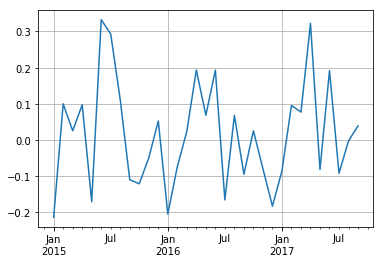

In [75]:
df4.resample(rule='M').mean()['A'].plot(kind='line', grid=True)
plt.show()

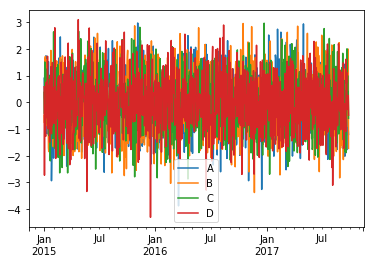

In [73]:
df4.resample(rule='D').mean().plot(kind='line')
plt.show()

In [77]:
tipdf
tipdf.to_csv('newTip.csv')